In [7]:
from pixell import enmap, enplot, reproject
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c
import healpy as hp

In [2]:
path = '/Users/jaguirre/Data/Mosaics/Updated_mosaics/'
filename = 'mastermapbeamcorInewd2.fits'

In [3]:
# Convenient wrapper for displaying enmaps
def eshow(x,**kwargs): enplot.show(enplot.plot(x,**kwargs)) 

In [12]:
enplot.show?

In [26]:
Imosaic = enmap.read_map(path+filename)

In [29]:
Imosaic[~np.isfinite(Imosaic)] = 0.

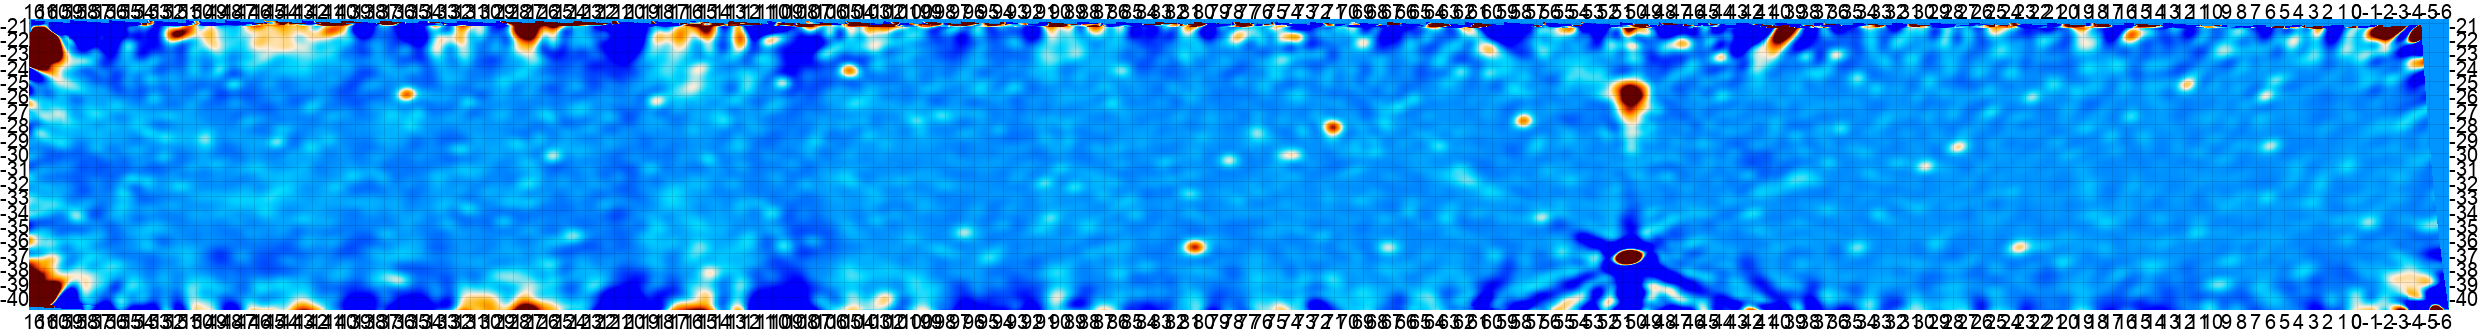

In [30]:
eshow(Imosaic,max=50,min=-15)

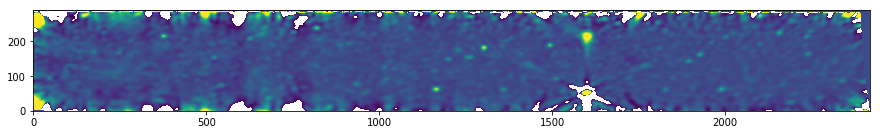

In [31]:
plt.figure(figsize=(15,8))
plt.imshow(Imosaic, vmin=-15, vmax=50, origin='lower')

In [8]:
gsm = reproject.enmap_from_healpix("GSM150MHz.fits", Imosaic.shape, Imosaic.wcs)

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting


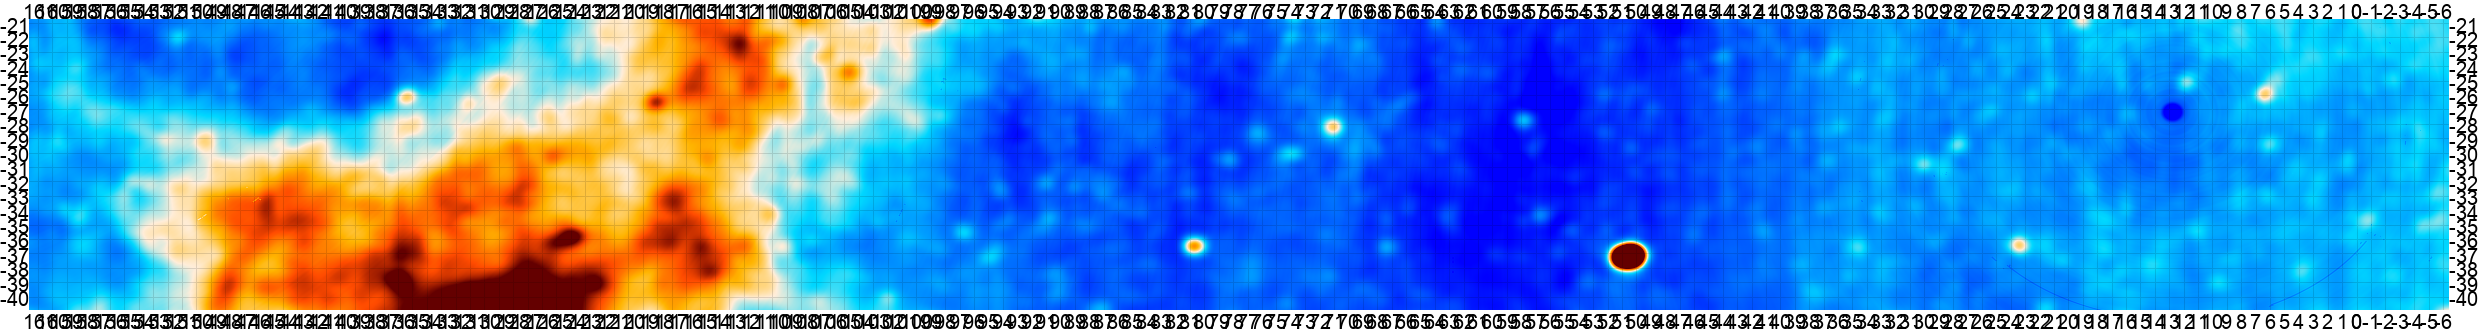

In [9]:
eshow(gsm)

In [45]:
gsm.write('/Users/jaguirre/Data/Mosaics/Updated_mosaics/GSM_HERA_stripe.fits')

In [38]:
Imosaic_hp = reproject.healpix_from_enmap_interp(Imosaic)

In [47]:
Imosaic_hp_nan = Imosaic_hp
Imosaic_hp_nan[Imosaic_hp == 0] = np.nan

/anaconda3/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:1176: RuntimeWarning: invalid value encountered in less
  result.data[result.data < 0] = 0.0
/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:1177: RuntimeWarning: invalid value encountered in greater
  result.data[result.data > 1] = 1.0


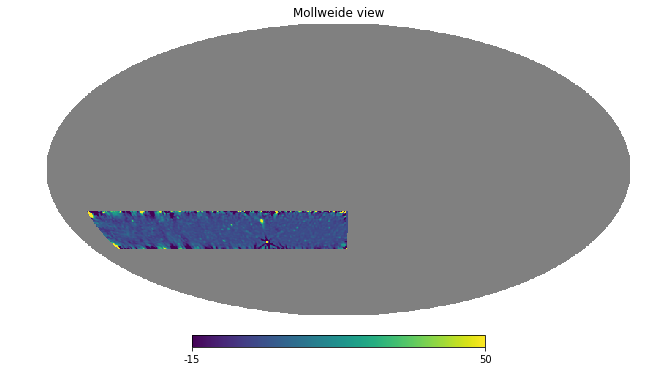

In [48]:
hp.mollview(Imosaic_hp, min=-15, max=50)

In [40]:
gsm_hp = hp.read_map('GSM150MHz.fits')

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


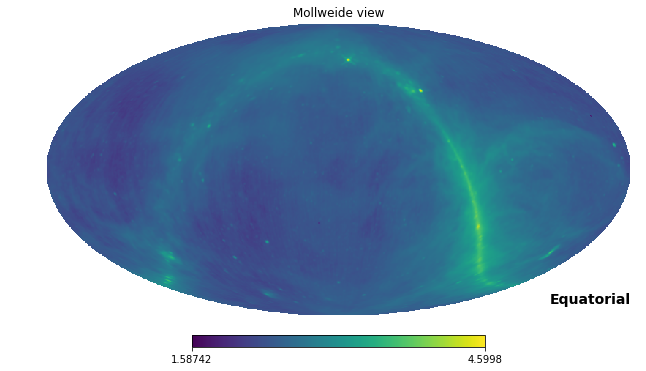

In [43]:
hp.mollview(np.log10(gsm_hp),coord=['G','C'])